In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread
import codecs
from subprocess import check_output
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [178]:
df_명동역 = pd.read_csv('../data/2상세_명동역.csv')
df_잠실역 = pd.read_csv('../data/2상세_잠실역.csv')
df_강남역 = pd.read_csv('../data/2상세_강남역.csv')
df_이태원역 = pd.read_csv('../data/2상세_이태원역.csv')
df_여의도역 = pd.read_csv('../data/2상세_여의도역.csv')
df_홍대입구역 = pd.read_csv('../data/2상세_홍대입구역.csv')

df_종로3가역 = pd.read_csv('../data/1기본_종로3가역.csv')
df_청담역 = pd.read_csv('../data/1기본_청담역.csv')
df_서울역 = pd.read_csv('../data/1기본_서울역.csv')
df_신촌 = pd.read_csv('../data/1기본_신촌역.csv')
df_사당역 = pd.read_csv('../data/1기본_사당역.csv')
df_혜화역 = pd.read_csv('../data/1기본_혜화역.csv')
df_성수역 = pd.read_csv('../data/1기본_성수역.csv')
df_신사역 = pd.read_csv('../data/1기본_신사역.csv')
df_판교역 = pd.read_csv('../data/1기본_판교역.csv')
df_영등포역 = pd.read_csv('../data/1기본_영등포역.csv')
df_압구정역 = pd.read_csv('../data/1기본_압구정역.csv')
df_을지로입구역 = pd.read_csv('../data/1기본_을지로입구역.csv')
df_서울대입구역 = pd.read_csv('../data/1기본_서울대입구역.csv')
df_가산디지털단지역 = pd.read_csv('../data/1기본_가산디지털단지역.csv')
df_성신여대입구역 = pd.read_csv('../data/1기본_성신여대입구역.csv')
df_동대문역사문화공원역 = pd.read_csv('../data/1기본_동대문역사문화공원역.csv')

In [179]:
dataframes = [df_명동역, df_잠실역, df_강남역, df_이태원역, df_여의도역, df_홍대입구역, df_종로3가역, df_청담역, df_서울역, df_신촌, df_사당역, df_혜화역, df_성수역, df_신사역, df_판교역, df_영등포역, df_압구정역, df_을지로입구역, df_서울대입구역, df_가산디지털단지역, df_성신여대입구역, df_동대문역사문화공원역]

for df in dataframes:
    df.drop(columns='Unnamed: 0', inplace=True)


In [180]:
df_all = pd.concat([df_명동역, df_잠실역, df_강남역, df_이태원역, df_여의도역, df_홍대입구역, df_종로3가역, df_청담역, df_서울역, df_신촌, df_사당역, df_혜화역, df_성수역, df_신사역, df_판교역, df_영등포역, df_압구정역, df_을지로입구역, df_서울대입구역, df_가산디지털단지역, df_성신여대입구역, df_동대문역사문화공원역], ignore_index=True)
df_all

,이름,역,구,카테고리,방문자_리뷰_개수,블로그_리뷰_개수,평점,주소,영업시간,부가서비스,방문자_리뷰_글,개인리뷰
0,마카오도우라오훠궈 명동점,명동역,중구,중식당,417,369,NaN,서울 중구 명동길 55 2층,매일 10:30 - 24:00,"단체석, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 273, 매장이 넓어요: 204, 재료가 신선해요: 195, 가성...","야채 고기 모두 무한리필 ! 28,000에 양고기 소고기 돼지 고기 모두 무한리필로..."
1,명동교자 본점,명동역,중구,"칼국수,만두","29,529","12,462",4.42,서울 중구 명동10길 29,"일 10:30 - 21:00 20:30 라스트오더, 월 10:30 - 21:00 2...","포장, 남/녀 화장실 구분","음식이 맛있어요: 14752, 양이 많아요: 3760, 특별한 메뉴가 있어요: 31...",요 날은 콩국수를 먹어봤는데 클로렐라면인지 초록초록 한 게 쫄깃하니 맛있었어요 \U...
2,청년고기장수 명동점,명동역,중구,돼지고기구이,31,98,NaN,서울 중구 명동10길 19-3 1층,매일 11:00 - 23:00 22:30 라스트오더,"단체석, 예약, 무선 인터넷, 남/녀 화장실 구분","고기 질이 좋아요: 20, 음식이 맛있어요: 19, 친절해요: 14, 가성비가 좋아...",명동에 새로 오픈한 무한리필 고기집입니다. 환풍기가 위 에 달려있지 않고 불판 바로...
3,육랩 종로점,종각역,종로구,한식,42,902,NaN,서울 종로구 우정국로2길 42 3층 육랩,"일 15:00 - 23:00 22:00 라스트오더, 월 16:00 - 23:00 2...","단체석, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 33, 인테리어가 멋져요: 17, 친절해요: 16, 재료가 신선해...","*2인세트 (65,000) 구성은 진갈비살(120g) + 토시살(1 20g) + 양..."
4,쯔루하시 후게츠 명동점,명동역,중구,일식당,"2,518","2,242",4.49,서울 중구 명동8길 21-5 해암빌딩 2층,일 11:30 - 21:30 14:30 - 17:00 브레이크타임 20:30 라스트...,"포장, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 1386, 특별한 메뉴가 있어요: 599, 친절해요: 400, 재...",고대하던 후게쯔! 드디어 방문완료! 현지에서 먹었던 그 맛 그대로 먹었습니다! 정말...
...,...,...,...,...,...,...,...,...,...,...,...,...
6197,1995 쌀국수,동대문역,중구,베트남음식,23,3,NaN,"서울 중구 마장로1길 28-7 1, 2층","월 00:00 - 24:00, 화 00:00 - 24:00, 수 00:00 - 24...","포장, 예약, 포장","음식이 맛있어요: 16, 친절해요: 12, 양이 많아요: 10, 가성비가 좋아요: ...",NaN
6198,D CAFE 동대문점,동묘앞역,중구,카페,630,59,4.62,서울 중구 마장로1가길 23 DWP 8층,"월 09:00 - 21:00, 화 09:00 - 21:00, 수 09:00 - 21...","단체석, 포장, 무선 인터넷, 남/녀 화장실 구분","커피가 맛있어요: 126, 친절해요: 73, 매장이 청결해요: 71, 대화하기 좋아...",NaN
6199,다정,동대문역사문화공원역,중구,떡볶이,128,20,NaN,서울 중구 을지로38길 33 1층 다정 즉석떡볶이,"월 11:00 - 22:00, 화 11:00 - 22:00, 수 11:00 - 22...",NaN,"음식이 맛있어요: 61, 친절해요: 19, 양이 많아요: 16, 재료가 신선해요: ...",NaN
6200,가장맛있는족발 동대문점,동대문역사문화공원역,중구,"족발,보쌈",316,25,4.38,서울 중구 을지로44길 12 지상 1층,"월 00:00 - 24:00, 화 00:00 - 24:00, 수 00:00 - 24...","단체석, 포장, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 88, 친절해요: 33, 양이 많아요: 26, 매장이 넓어요: 1...",NaN


In [181]:
df_all['방문자_리뷰_개수'] = df_all['방문자_리뷰_개수'].str.replace(',', '')
df_all['블로그_리뷰_개수'] = df_all['블로그_리뷰_개수'].str.replace(',', '')
# string type을 숫자로 변경

In [182]:
df_all['평점'] = df_all['평점'].astype(float)
df_all['방문자_리뷰_개수'] = df_all['방문자_리뷰_개수'].astype(float)
df_all['블로그_리뷰_개수'] = df_all['블로그_리뷰_개수'].astype(float)
df =  df_all

### 여의도역에서 평점이 4.3 이상이고 방문자 리뷰, 블로그 리뷰 개수가 1000개 이상인 음식점?

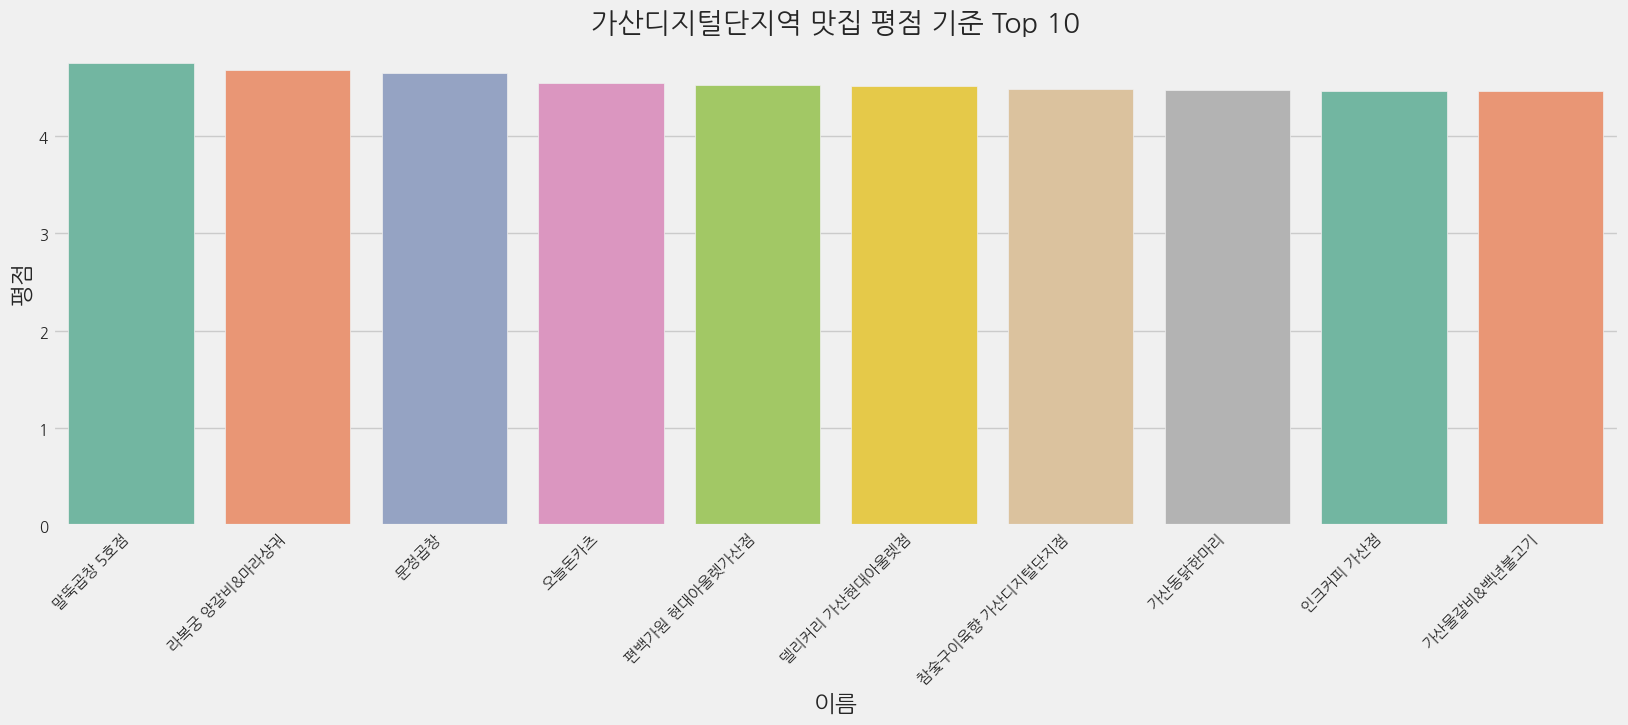

In [183]:
condition = (df['역'] == '가산디지털단지역') & (df['평점'] >= 4.3) & (df['방문자_리뷰_개수'] >= 500) & (df['블로그_리뷰_개수'] >= 300)
# 조건을 만족하는 행 선택
filtered_df = df[condition]

filtered_df = filtered_df.sort_values(by='평점', ascending=False)
plt.subplots(figsize=(18,6))
ax = sns.barplot(x=filtered_df['이름'][:10], y=filtered_df['평점'][:10],palette='Set2')
plt.title('가산디지털단지역 맛집 평점 기준 Top 10')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 리뷰 개수 합계가 큰 순으로 여의도역 맛집 Top 10 시각화(맛집 기준: 평점 4.3 이상, 방문자_리뷰_개수 500 이상, 블로그_리뷰_개수 300 이상)

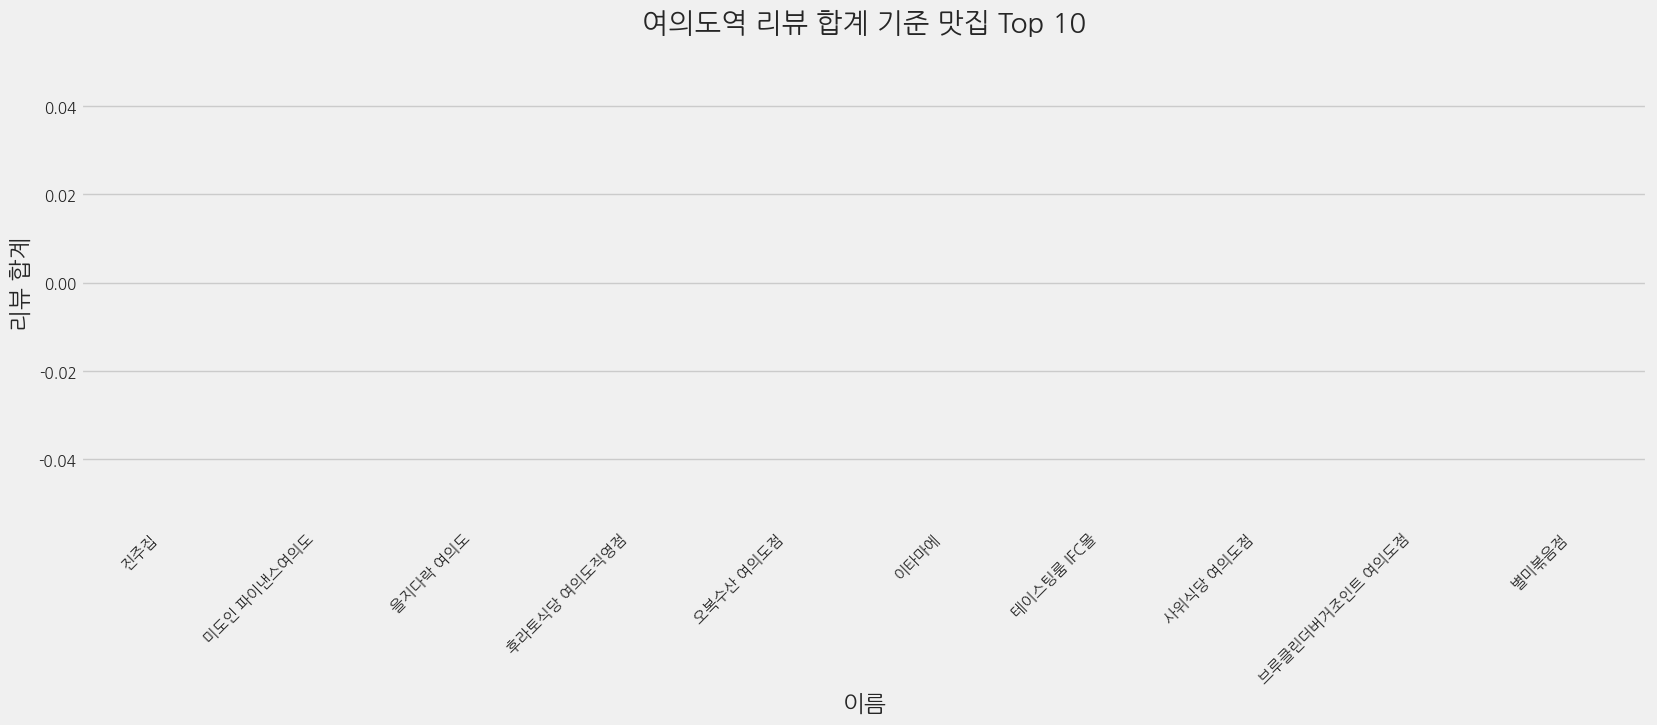

In [184]:
df['리뷰 합계'] = filtered_df['방문자_리뷰_개수'] + filtered_df['블로그_리뷰_개수']

condition = (df['역'] == '여의도역') & (df['평점'] >= 4.3) & (df['방문자_리뷰_개수'] >= 500) & (df['블로그_리뷰_개수'] >= 300)
filtered_df = df[condition]

filtered_df = filtered_df.sort_values(by='리뷰 합계', ascending=False)

plt.subplots(figsize=(18,6))
ax = sns.barplot(x=filtered_df['이름'][:10], y=(filtered_df['리뷰 합계'])[:10],palette='husl')
plt.title('여의도역 리뷰 합계 기준 맛집 Top 10')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 여의도에는 어떤 카테고리의 메뉴의 식당이 많을까?

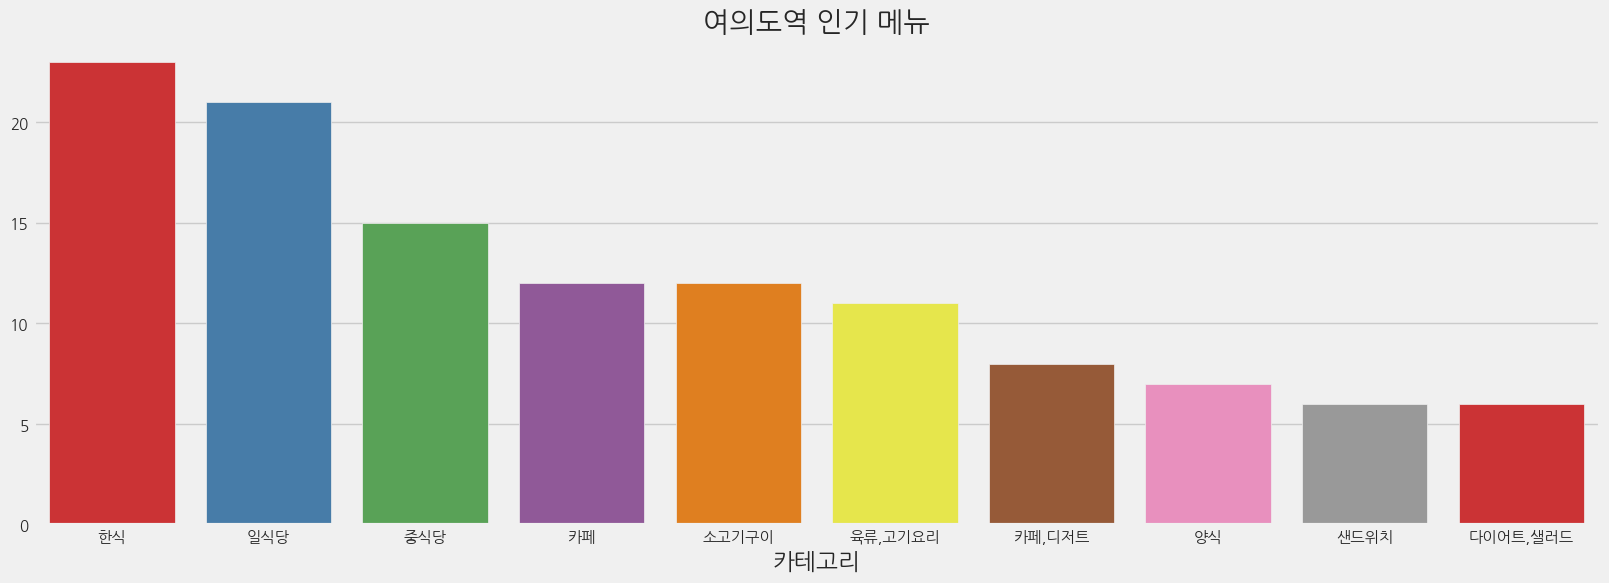

In [185]:
condition = (df['역'] == '여의도역')
# 조건을 만족하는 행 선택
filtered_df = df[condition]

plt.subplots(figsize=(18,6))
sns.barplot(x=filtered_df['카테고리'].value_counts()[:10].index, y=filtered_df['카테고리'].value_counts()[:10].values,palette='Set1')
plt.title('여의도역 인기 메뉴')
plt.show()

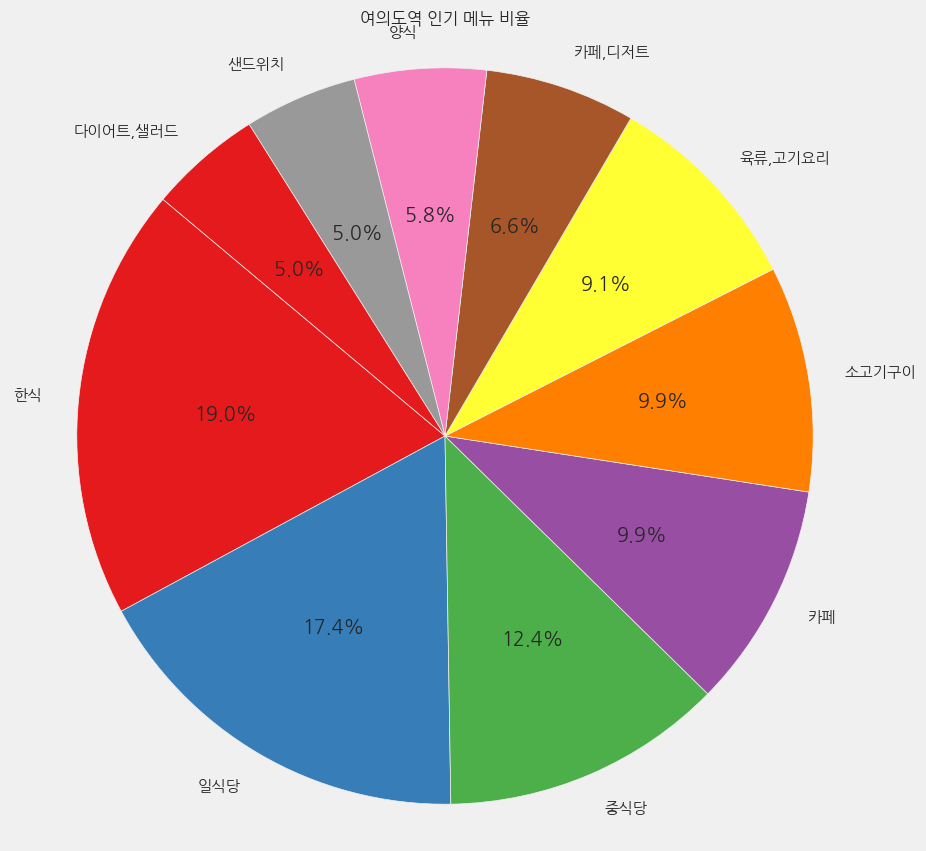

In [186]:
condition = (df['역'] == '여의도역')
# 조건을 만족하는 행 선택
filtered_df = df[condition]

# 데이터 가공: 가장 인기 있는 10개의 카테고리를 선택
top_categories = filtered_df['카테고리'].value_counts()[:10]

# 원형 그래프 그리기
plt.figure(figsize=(10, 10))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('여의도역 인기 메뉴 비율', fontsize=12)
plt.axis('equal')  # 원형 그래프를 원형으로 유지하기 위해 설정

plt.show()

### 국밥, 곰탕, 감자탕, 곱창, 찌개류를 먹으려면 어디로 가야할까?

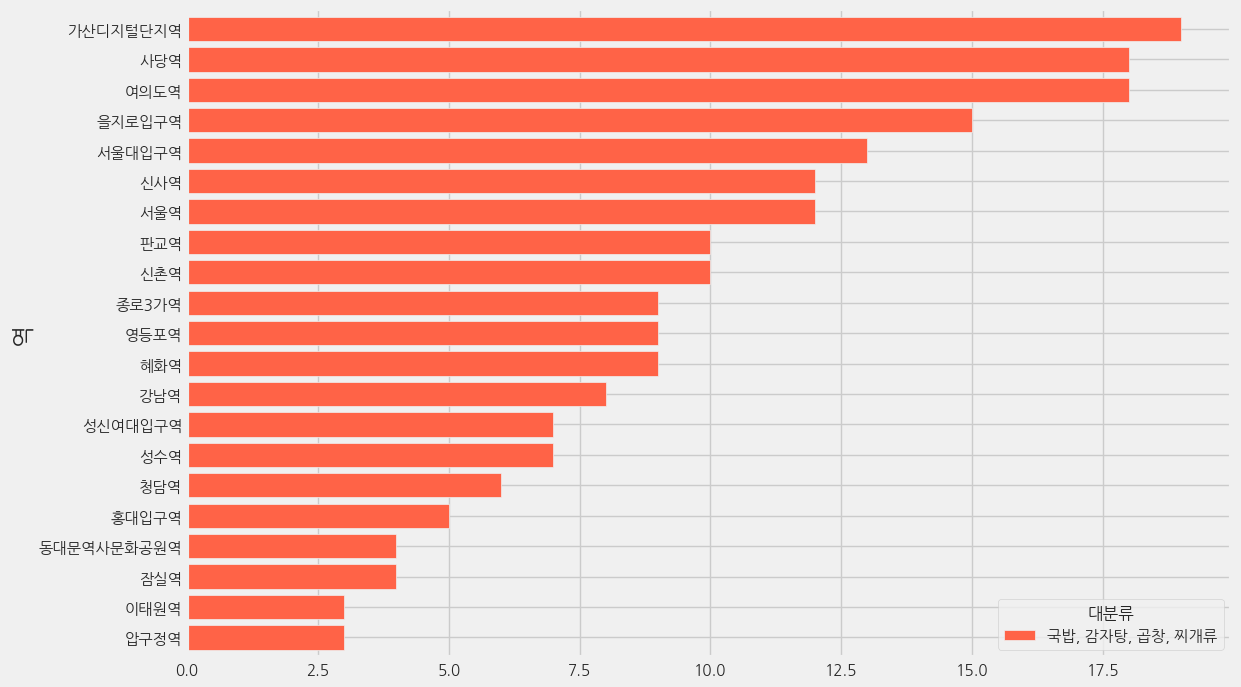

In [187]:

#station_list = ['가산디지털단지역','잠실역', '홍대입구역','명동역','이태원역', '신촌역','성수역', '영등포역', '혜화역','여의도역', '압구정역', '신사역', '판교역', '종로3가역', '명동역', '강남역', '청담역', '서울대입구역']
station_list = ['홍대입구역', '강남역', '명동역', '신촌역', '서울대입구역', '사당역', '혜화역', '가산디지털단지역', '서울역', '청담역', '종로3가역', '을지로입구역', '동대문역사문화공원역',   '성신여대입구역', '이태원역', '성수역',  '영등포역', '여의도역', '잠실역', '압구정역', '신사역', '판교역']
category_list = ['갈비탕', '감자탕', '곰탕,설렁탕', '곱창,막창,양','국밥', '순대,순댓국', '찌개,전골', '해장국']
# 역 추리기
df_station = df[df['역'].isin(station_list)]
# 메뉴 추리기
df_category = df_station[df_station['카테고리'].isin(category_list)]
df_category['대분류'] = '국밥, 감자탕, 곱창, 찌개류'

pd.crosstab(df_category.역, df_category.대분류).sort_values(by='국밥, 감자탕, 곱창, 찌개류', ascending=True).plot.barh(stacked=True,width=0.8,color='tomato')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### 국밥의 메카, 가산디지털단지 역의 주요 식당들은 어떤 메뉴로 구성되었을까?

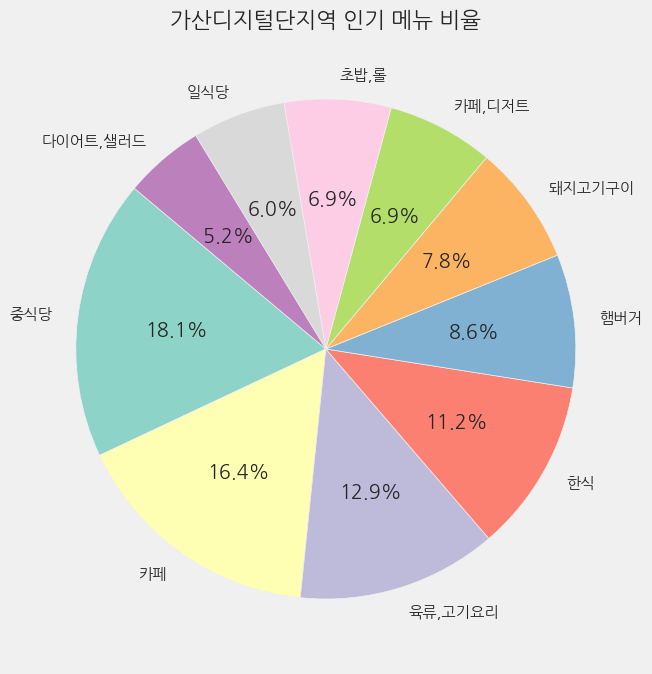

In [188]:
condition = (df['역'] == '가산디지털단지역')
# 조건을 만족하는 행 선택
filtered_df = df[condition]

# 데이터 가공: 가장 인기 있는 10개의 카테고리를 선택
top_categories = filtered_df['카테고리'].value_counts()[:10]

# 원형 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
ax.set_title('가산디지털단지역 인기 메뉴 비율', fontsize=16)

# 원형 그래프 위치 조절
plt.subplots_adjust(left=0.1, right=0.65, top=0.7)  # 조절할 위치를 설정

plt.axis('equal')  # 원형 그래프를 원형으로 유지하기 위해 설정

plt.show()


### 곱창, 막창을 먹으려면 어디로 가야할까?

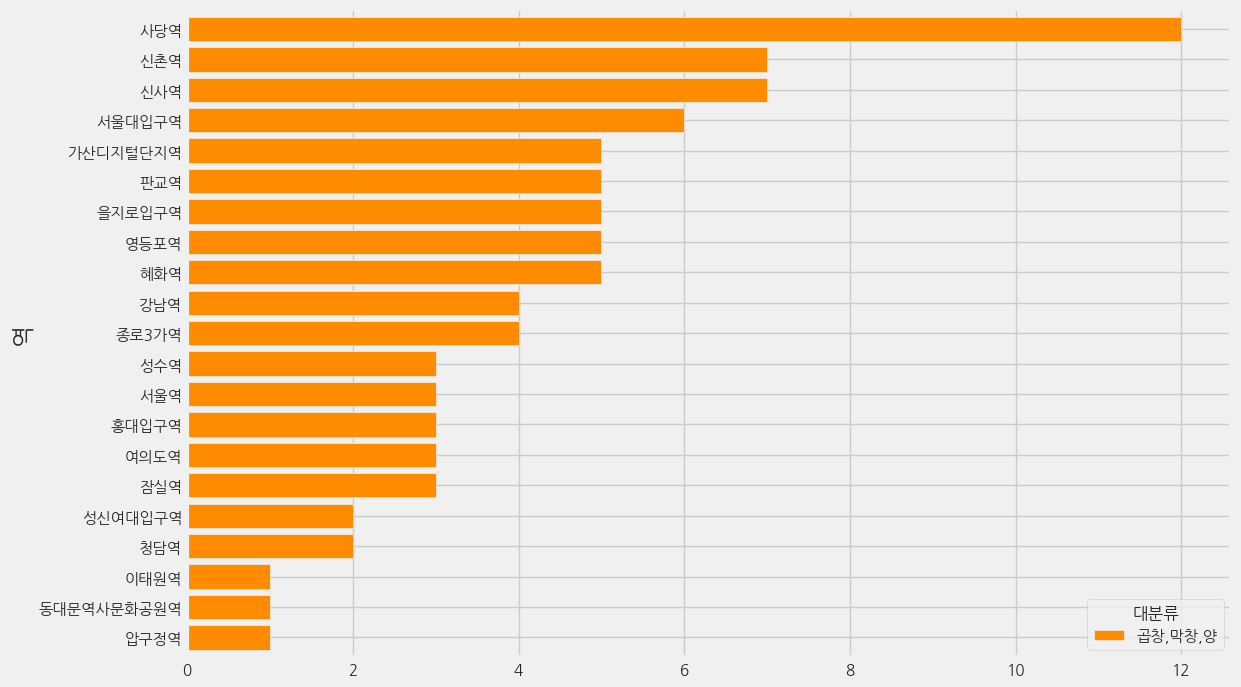

In [189]:
station_list = ['홍대입구역', '강남역', '명동역', '신촌역', '서울대입구역', '사당역', '혜화역', '가산디지털단지역', '서울역', '청담역', '종로3가역', '을지로입구역', '동대문역사문화공원역',   '성신여대입구역', '이태원역', '성수역',  '영등포역', '여의도역', '잠실역', '압구정역', '신사역', '판교역']
category_list = ['곱창,막창,양']
# 역 추리기
df_station = df[df['역'].isin(station_list)]
# 메뉴 추리기
df_category = df_station[df_station['카테고리'].isin(category_list)]
df_category['대분류'] = '곱창,막창,양'

pd.crosstab(df_category.역, df_category.대분류).sort_values(by='곱창,막창,양', ascending=True).plot.barh(stacked=True,width=0.8,color='darkorange')

fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

평점도 높고 리뷰도 많은 가게는 무슨 특징이 있을까?

그래프 평점 1점부터 5점까지 보여주기

그래프 가독성 높이기(그래가 담고 있는 정보를 한번에 알 수 있게)

합계 위주로 sorting, 갈비탕 등 특정 종목을 강조

유동 인구 넣기


### 그럼 술집은 어떤 역에 많지?

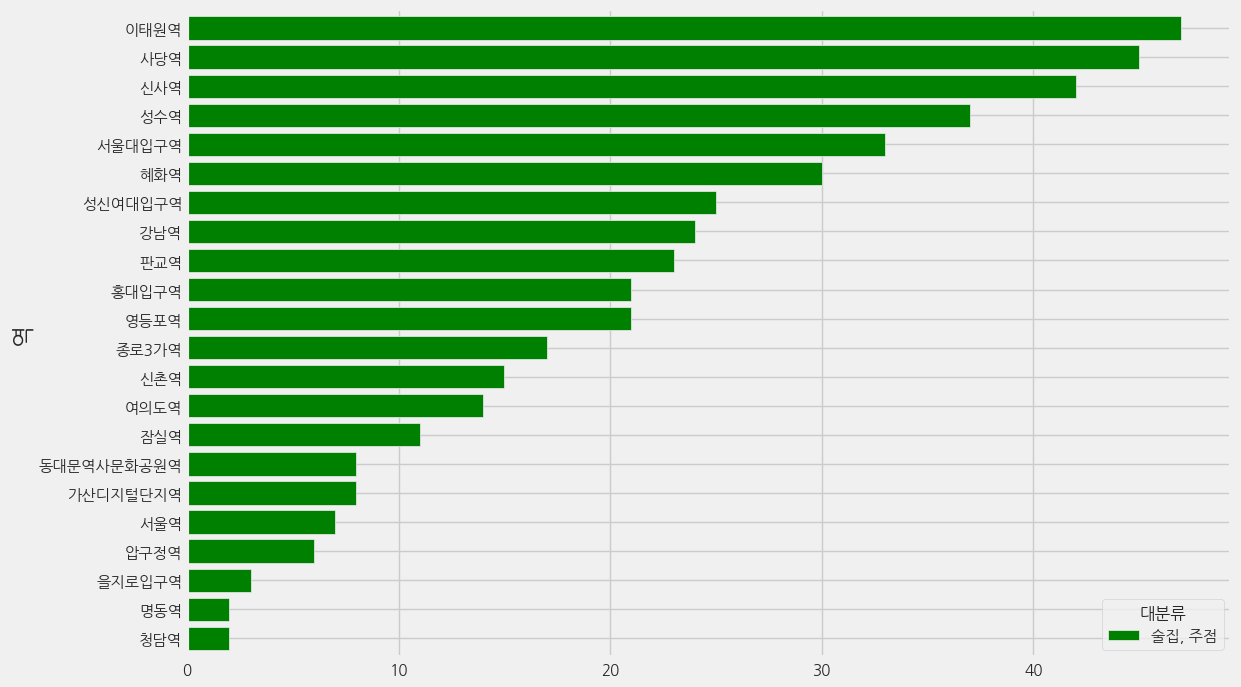

In [190]:
station_list = ['홍대입구역', '강남역', '명동역', '신촌역', '서울대입구역', '사당역', '혜화역', '가산디지털단지역', '서울역', '청담역', '종로3가역', '을지로입구역', '동대문역사문화공원역',   '성신여대입구역', '이태원역', '성수역',  '영등포역', '여의도역', '잠실역', '압구정역', '신사역', '판교역']
drink_list = ['술집', '요리주점', '전통,민속주점', '바(BAR)',  '와인', '이자카야']
# 역 추리기
df_station = df[df['역'].isin(station_list)]
# 메뉴 추리기
df_category = df_station[df_station['카테고리'].isin(drink_list)]

df_category['대분류'] = '술집, 주점'
pd.crosstab(df_category.역, df_category.대분류).sort_values(by=['술집, 주점'], ascending=True).plot.barh(stacked=True,width=0.8,color='green')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### 카페가 많은 역은?

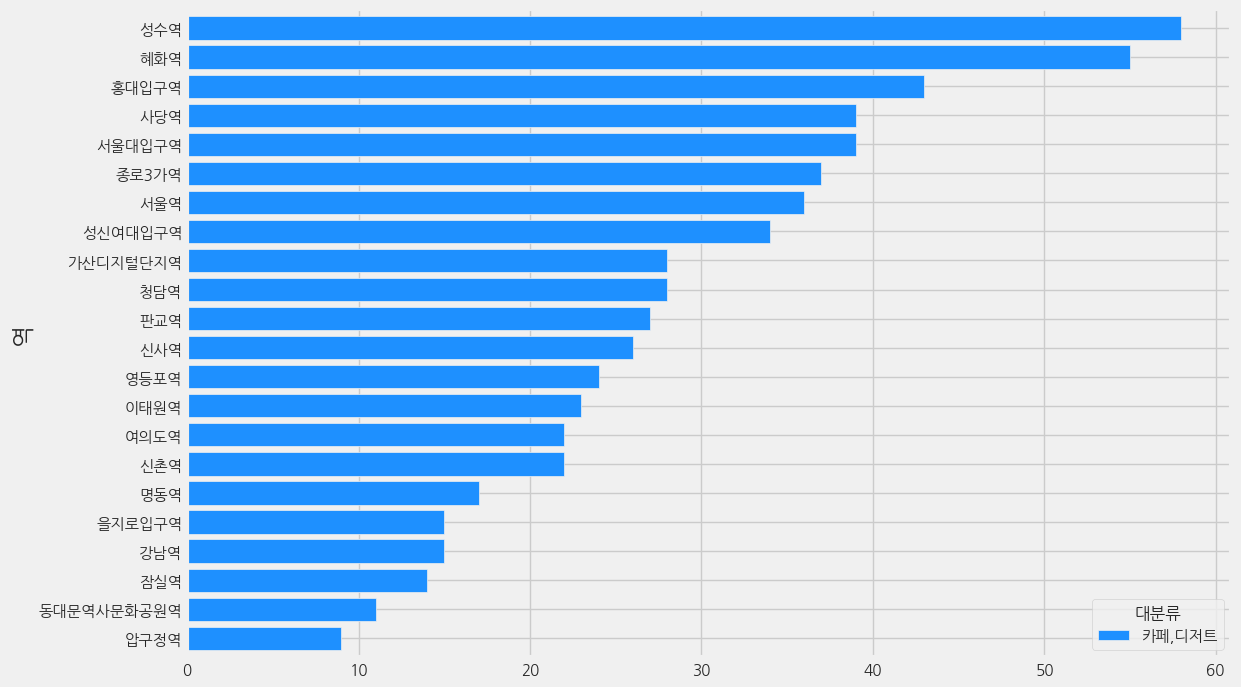

In [191]:
station_list = ['홍대입구역', '강남역', '명동역', '신촌역', '서울대입구역', '사당역', '혜화역', '가산디지털단지역', '서울역', '청담역', '종로3가역', '을지로입구역', '동대문역사문화공원역',   '성신여대입구역', '이태원역', '성수역',  '영등포역', '여의도역', '잠실역', '압구정역', '신사역', '판교역']
cafe_list = ['카페', '카페,디저트', '케이크전문', '북카페']

# 역 추리기
df_station = df[df['역'].isin(station_list)]
# 메뉴 추리기
df_category = df_station[df_station['카테고리'].isin(cafe_list)]

df_category['대분류'] = '카페,디저트'
pd.crosstab(df_category.역, df_category.대분류).sort_values('카페,디저트').plot.barh(stacked=True,width=0.8,color='dodgerblue')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### 압구정역에 의외로 카페가 적다. 그럼 압구정역에서는 어떤 메뉴가 인기일까?

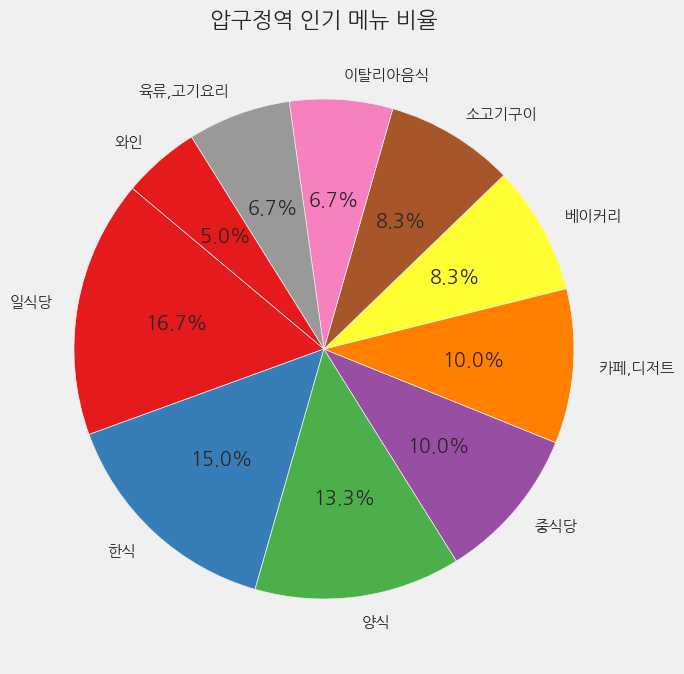

In [192]:
condition = (df['역'] == '압구정역')
# 조건을 만족하는 행 선택
filtered_df = df[condition]

# 데이터 가공: 가장 인기 있는 10개의 카테고리를 선택
top_categories = filtered_df['카테고리'].value_counts()[:10]

# 원형 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
ax.set_title('압구정역 인기 메뉴 비율', fontsize=16)

# 원형 그래프 위치 조절
plt.subplots_adjust(left=0.1, right=0.65, top=0.7)  # 조절할 위치를 설정

plt.axis('equal')  # 원형 그래프를 원형으로 유지하기 위해 설정

plt.show()


### 리뷰 합계가 많을수록 평점도 좋을까?

In [193]:
df['리뷰 합계'] = df['방문자_리뷰_개수'] + df['블로그_리뷰_개수']
df1 = df.dropna()

df1 = df1[df1['리뷰 합계']<3500]
data_sort_f = df1.sort_values(by='리뷰 합계', ascending=False)
data_sort_t = df1.sort_values(by='리뷰 합계', ascending=True)

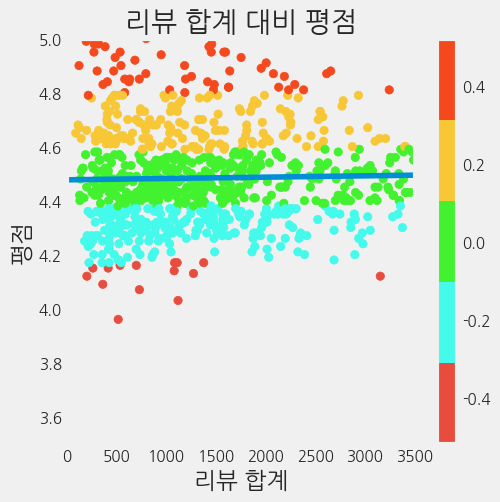

In [194]:
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
# 모델에게 줄 입력 데이터와 출력 데이터
df['리뷰 합계'] = df['방문자_리뷰_개수'] + df['블로그_리뷰_개수']
df1 = df.dropna()
df1 = df1[df1['리뷰 합계']<3500]

x = df1['리뷰 합계'].values.reshape(-1,1)
y = df1['평점'].values

color_step = ['#e74c3c', '#43faeb', '#42f22e', '#f7c736', '#f5481d']
my_mcap = ListedColormap(color_step)
# 회귀분석모델
model = LinearRegression()
# 회귀분석모델 훈련
model.fit(x,y)

new_x = np.linspace(1, 3500, 1000)
predicted = model.predict(new_x.reshape(-1,1))
df1['오차'] = df1['평점'] - model.predict(x)

plt.figure(figsize=(5,5))
plt.scatter(df1['리뷰 합계'], df1['평점'], c=df1['오차'], cmap = my_mcap)
plt.plot(new_x, predicted)

plt.grid()
plt.title('리뷰 합계 대비 평점',fontsize = 20)
plt.xlabel('리뷰 합계')
plt.ylabel('평점')

# y축 범위 설정
plt.xlim(0, 3500)
plt.ylim(3.5, 5)

plt.colorbar()
plt.show()

## 방문자 리뷰 개수와 블로그 리뷰 개수 중 평점과 비례하는 지표는 어떤 것일까?

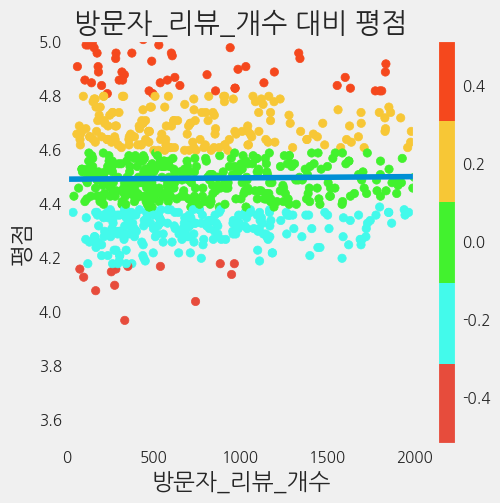

In [195]:
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

# 모델에게 줄 입력 데이터와 출력 데이터
#df['리뷰 합계'] = df['방문자_리뷰_개수'] + df['블로그_리뷰_개수']
df1 = df.dropna()
df1 = df1[df1['방문자_리뷰_개수']<2000]

x = df1['방문자_리뷰_개수'].values.reshape(-1,1)
y = df1['평점'].values

color_step = ['#e74c3c', '#43faeb', '#42f22e', '#f7c736', '#f5481d']
my_mcap = ListedColormap(color_step)
# 회귀분석모델
model = LinearRegression()
# 회귀분석모델 훈련
model.fit(x,y)

new_x = np.linspace(1, 2000, 1000)
predicted = model.predict(new_x.reshape(-1,1))
df1['오차'] = df1['평점'] - model.predict(x)

plt.figure(figsize=(5,5))
plt.scatter(df1['방문자_리뷰_개수'], df1['평점'], c=df1['오차'], cmap = my_mcap)
plt.plot(new_x, predicted)
plt.grid()
plt.title('방문자_리뷰_개수 대비 평점',fontsize = 20)
plt.xlabel('방문자_리뷰_개수')
plt.ylabel('평점')

# y축 범위 설정
plt.xlim(0, 2000)
plt.ylim(3.5, 5)

plt.colorbar()
plt.show()

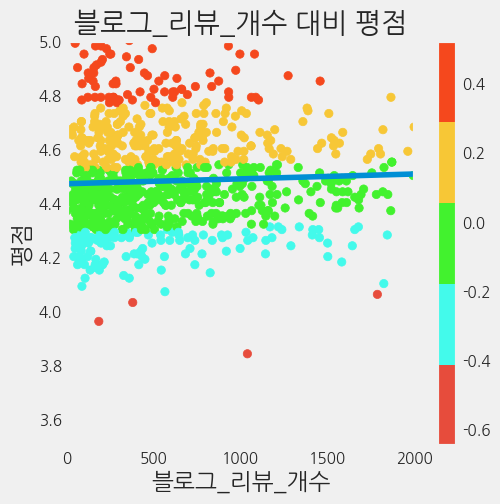

In [196]:
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

# 모델에게 줄 입력 데이터와 출력 데이터
#df['리뷰 합계'] = df['방문자_리뷰_개수'] + df['블로그_리뷰_개수']
df1 = df.dropna()
df1 = df1[df1['블로그_리뷰_개수']<2000]

x = df1['블로그_리뷰_개수'].values.reshape(-1,1)
y = df1['평점'].values

color_step = ['#e74c3c', '#43faeb', '#42f22e', '#f7c736', '#f5481d']
my_mcap = ListedColormap(color_step)
# 회귀분석모델
model = LinearRegression()
# 회귀분석모델 훈련
model.fit(x,y)

new_x = np.linspace(1, 2000, 1000)
predicted = model.predict(new_x.reshape(-1,1))
df1['오차'] = df1['평점'] - model.predict(x)

plt.figure(figsize=(5,5))
plt.scatter(df1['블로그_리뷰_개수'], df1['평점'], c=df1['오차'], cmap = my_mcap)
plt.plot(new_x, predicted)
plt.grid()
plt.title('블로그_리뷰_개수 대비 평점',fontsize = 20)
plt.xlabel('블로그_리뷰_개수')
plt.ylabel('평점')

# y축 범위 설정
plt.xlim(0, 2000)
plt.ylim(3.5, 5)

plt.colorbar()
plt.show()

#### 블로그 리뷰의 신빙성이 더 높음을 알 수 있다!

## 서울시에서 평점 4.5 이상이고 리뷰 합계 순으로 Top 10 식당 선정하여 분석

In [197]:
df_best = df[(df['평점']>=4.4) & (df['방문자_리뷰_개수']>2000) & (df['블로그_리뷰_개수']>=2000) & (df['리뷰 합계'] > 4000)]
df_best = df_best.dropna(subset=['개인리뷰'])
df_best = df_best.sort_values(by = ['리뷰 합계', '평점'], ascending = [False, False])
df_top10 = df_best.head(10)
df_top10


,이름,역,구,카테고리,방문자_리뷰_개수,블로그_리뷰_개수,평점,주소,영업시간,부가서비스,방문자_리뷰_글,개인리뷰,리뷰 합계
1,명동교자 본점,명동역,중구,"칼국수,만두",29529.0,12462.0,4.42,서울 중구 명동10길 29,"일 10:30 - 21:00 20:30 라스트오더, 월 10:30 - 21:00 2...","포장, 남/녀 화장실 구분","음식이 맛있어요: 14752, 양이 많아요: 3760, 특별한 메뉴가 있어요: 31...",요 날은 콩국수를 먹어봤는데 클로렐라면인지 초록초록 한 게 쫄깃하니 맛있었어요 \U...,41991.0
27,더식당,명동역,중구,한식,13441.0,5552.0,4.66,서울 중구 명동10길 36 2층,매일 11:00 - 22:00 21:00 라스트오더,"단체석, 포장, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 7285, 가성비가 좋아요: 4123, 친절해요: 3551, 양이...",랍스타가 포함된 3인세트 시켰어요 선택은 불고기랑 열 무국수 시켰는데...불고기는 ...,18993.0
583,쉐이크쉑 강남대로점,강남역,서초구,햄버거,13411.0,4795.0,4.44,서울 서초구 강남대로 421,"매일 10:30 - 22:00, - 9/7(목) 매장 행사로 12:00 - 22:0...","포장, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 3927, 매장이 넓어요: 1750, 재료가 신선해요: 1167,...",쉐이크쉑은 진짜 늘 믿고 갑니다. 특히 이번 비스큐 한치 관련 메뉴들은 다 맛있네...,18206.0
1133,진주집,여의도역,영등포구,국수,8568.0,5623.0,4.40,서울 영등포구 국제금융로6길 33 지하 1층,"월 10:00 - 20:00, 화 10:00 - 20:00, 수 10:00 - 20...","단체석, 포장, 예약","음식이 맛있어요: 3756, 양이 많아요: 1076, 매장이 넓어요: 1009, 특...",여름이면 꼭 가는 집이에요. 항상 성인2 아이 한명 가서 종류별로 다 시켜먹는데요....,14191.0
655,노티드 강남 카카오,강남역,서초구,카페,11456.0,2245.0,4.53,서울 서초구 강남대로 429,"매일 10:30 - 21:00, - 카카오의 운영에 따라 일시적으로 변동될 수 있습니다.","포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분","디저트가 맛있어요: 7396, 특별한 메뉴가 있어요: 2496, 친절해요: 1903...",크림 도넛이 맛있기로 유명한 노티드 도넛. 카카오 프렌 즈 안에 위치했습니다. 예전...,13701.0
1111,패션5,한강진역,용산구,베이커리,9191.0,3871.0,4.41,서울 용산구 이태원로 272 SPC빌딩,"일 07:30 - 22:00, 월 07:30 - 22:00, 화 07:30 - 22...","포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분","빵이 맛있어요: 3049, 특별한 메뉴가 있어요: 1704, 인테리어가 멋져요: 1...",10년도 넘게 이태원초입을 굳건하게 지키고 있는 패션5. 작품같은 케이크 구경하는 ...,13062.0
542,감성타코 강남역점,강남역,강남구,"멕시코,남미음식",2600.0,9148.0,4.40,서울 강남구 강남대로 406 지하1층 감성타코,매일 11:30 - 22:00 21:00 라스트오더,"단체석, 포장, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 1091, 매장이 넓어요: 484, 친절해요: 312, 인테리어가...","꽤나 유명한 타코 체인점인 것으로 알고 있는데, 이번에 처음 방문해봤다. 타코를 한...",11748.0
1436,감성타코 합정점,합정역,마포구,"멕시코,남미음식",2781.0,8062.0,4.46,서울 마포구 월드컵로3길 14 지하1층,월 11:30 - 22:00 15:30 - 16:30 브레이크타임 21:00 라스트...,"예약, 무선 인터넷","음식이 맛있어요: 990, 매장이 넓어요: 381, 친절해요: 290, 특별한 메뉴...","자주가는 타코집 입니당. 이번에는 "" 감성그릴드 파히타"" 이집에서 best 음식중 ...",10843.0
253,치즈룸&테이스팅룸 롯데월드몰점,잠실역,송파구,이탈리아음식,7896.0,2878.0,4.51,서울 송파구 올림픽로 300 롯데월드몰 5층,매일 10:30 - 22:00,"단체석, 포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분, 예약","음식이 맛있어요: 3307, 특별한 메뉴가 있어요: 1679, 인테리어가 멋져요: ...",올 때마다 성공하는 맛집이예요. 롯데월드몰이라 가격대 는 있지만 모든 메뉴가 다 맛...,10774.0
847,다운타우너 한남,이태원역,용산구,햄버거,5290.0,4145.0,4.58,서울 용산구 대사관로5길 12 1층 다운타우너 한남점,매일 11:30 - 21:30 20:30 라스트오더,"포장, 포장, 무선 인터넷","음식이 맛있어요: 2139, 재료가 신선해요: 663, 친절해요: 635, 특별한 ...",베이컨치즈 두개랑 스파이시 치폴레 감자튀김 먹었어요 : ) 너무 맛있어요! 햄버거는...,9435.0


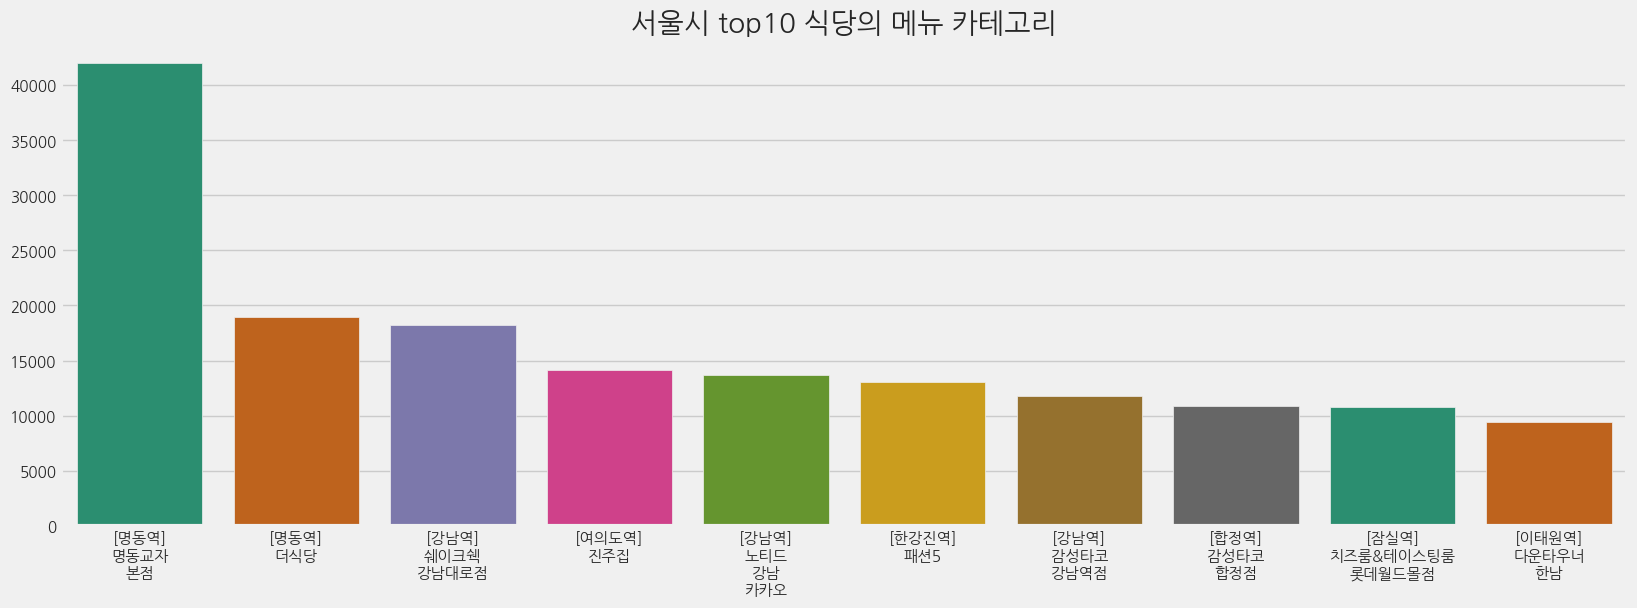

In [198]:
plt.subplots(figsize=(18,6))
df_top10['이름'] = df_top10['이름'].str.replace(' ', '\n')
sns.barplot(x=('[' + df_top10['역'] + ']' + '\n' + df_top10['이름']), y=df_top10['리뷰 합계'].values,palette='Dark2')
plt.title('서울시 top10 식당의 메뉴 카테고리')
plt.show()

### 명동역 명동교자 본점이 잘 된 이유 리뷰 중심으로 분석해보자

In [199]:
df_review = pd.read_csv('../data/project_all_with_review.csv')
df_review['리뷰 합계'] = df_review['방문자_리뷰_개수'] + df_review['블로그_리뷰_개수']
df_best = df_review[(df_review['평점']>=4.4) & (df_review['방문자_리뷰_개수']>2000) & (df_review['블로그_리뷰_개수']>=2000) & (df_review['리뷰 합계'] > 4000)]
df_best = df_best.dropna(subset=['개인리뷰'])
df_best = df_best.sort_values(by = ['리뷰 합계', '평점'], ascending = [False, False])
df_review10 = df_best.head(10)
df_review10

,Unnamed: 0,이름,역,구,카테고리,방문자_리뷰_개수,블로그_리뷰_개수,평점,주소,영업시간,부가서비스,방문자_리뷰_글,개인리뷰,리뷰 시각화,리뷰 합계
1,1,명동교자 본점,명동역,중구,"칼국수,만두",29529.0,12462.0,4.42,서울 중구 명동10길 29,"일 10:30 - 21:00 20:30 라스트오더, 월 10:30 - 21:00 2...","포장, 남/녀 화장실 구분","음식이 맛있어요: 14752, 양이 많아요: 3760, 특별한 메뉴가 있어요: 31...",요 날은 콩국수를 먹어봤는데 클로렐라면인지 초록초록 한 게 쫄깃하니 맛있었어요 \U...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",41991.0
27,27,더식당,명동역,중구,한식,13441.0,5552.0,4.66,서울 중구 명동10길 36 2층,매일 11:00 - 22:00 21:00 라스트오더,"단체석, 포장, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 7285, 가성비가 좋아요: 4123, 친절해요: 3551, 양이...",랍스타가 포함된 3인세트 시켰어요 선택은 불고기랑 열 무국수 시켰는데...불고기는 ...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",18993.0
583,583,쉐이크쉑 강남대로점,강남역,서초구,햄버거,13411.0,4795.0,4.44,서울 서초구 강남대로 421,"매일 10:30 - 22:00, - 9/7(목) 매장 행사로 12:00 - 22:0...","포장, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 3927, 매장이 넓어요: 1750, 재료가 신선해요: 1167,...",쉐이크쉑은 진짜 늘 믿고 갑니다. 특히 이번 비스큐 한치 관련 메뉴들은 다 맛있네...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",18206.0
1133,1133,진주집,여의도역,영등포구,국수,8568.0,5623.0,4.40,서울 영등포구 국제금융로6길 33 지하 1층,"월 10:00 - 20:00, 화 10:00 - 20:00, 수 10:00 - 20...","단체석, 포장, 예약","음식이 맛있어요: 3756, 양이 많아요: 1076, 매장이 넓어요: 1009, 특...",여름이면 꼭 가는 집이에요. 항상 성인2 아이 한명 가서 종류별로 다 시켜먹는데요....,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",14191.0
655,655,노티드 강남 카카오,강남역,서초구,카페,11456.0,2245.0,4.53,서울 서초구 강남대로 429,"매일 10:30 - 21:00, - 카카오의 운영에 따라 일시적으로 변동될 수 있습니다.","포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분","디저트가 맛있어요: 7396, 특별한 메뉴가 있어요: 2496, 친절해요: 1903...",크림 도넛이 맛있기로 유명한 노티드 도넛. 카카오 프렌 즈 안에 위치했습니다. 예전...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",13701.0
1111,1111,패션5,한강진역,용산구,베이커리,9191.0,3871.0,4.41,서울 용산구 이태원로 272 SPC빌딩,"일 07:30 - 22:00, 월 07:30 - 22:00, 화 07:30 - 22...","포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분","빵이 맛있어요: 3049, 특별한 메뉴가 있어요: 1704, 인테리어가 멋져요: 1...",10년도 넘게 이태원초입을 굳건하게 지키고 있는 패션5. 작품같은 케이크 구경하는 ...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",13062.0
542,542,감성타코 강남역점,강남역,강남구,"멕시코,남미음식",2600.0,9148.0,4.40,서울 강남구 강남대로 406 지하1층 감성타코,매일 11:30 - 22:00 21:00 라스트오더,"단체석, 포장, 예약, 무선 인터넷, 남/녀 화장실 구분","음식이 맛있어요: 1091, 매장이 넓어요: 484, 친절해요: 312, 인테리어가...","꽤나 유명한 타코 체인점인 것으로 알고 있는데, 이번에 처음 방문해봤다. 타코를 한...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",11748.0
1436,1436,감성타코 합정점,합정역,마포구,"멕시코,남미음식",2781.0,8062.0,4.46,서울 마포구 월드컵로3길 14 지하1층,월 11:30 - 22:00 15:30 - 16:30 브레이크타임 21:00 라스트...,"예약, 무선 인터넷","음식이 맛있어요: 990, 매장이 넓어요: 381, 친절해요: 290, 특별한 메뉴...","자주가는 타코집 입니당. 이번에는 "" 감성그릴드 파히타"" 이집에서 best 음식중 ...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",10843.0
253,253,치즈룸&테이스팅룸 롯데월드몰점,잠실역,송파구,이탈리아음식,7896.0,2878.0,4.51,서울 송파구 올림픽로 300 롯데월드몰 5층,매일 10:30 - 22:00,"단체석, 포장, 예약, 포장, 무선 인터넷, 남/녀 화장실 구분, 예약","음식이 맛있어요: 3307, 특별한 메뉴가 있어요: 1679, 인테리어가 멋져요: ...",올 때마다 성공하는 맛집이예요. 롯데월드몰이라 가격대 는 있지만 모든 메뉴가 다 맛...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",10774.0
847,847,다운타우너 한남,이태원역,용산구,햄버거,5290.0,4145.0,4.58,서울 용산구 대사관로5길 12 1층 다운타우너 한남점,매일 11:30 - 21:30 20:30 라스트오더,"포장, 포장, 무선 인터넷","음식이 맛있어요: 2139, 재료가 신선해요: 663, 친절해요: 635, 특별한 ...",베이컨치즈 두개랑 스파이시 치폴레 감자튀김 먹었어요 : ) 너무 맛있어요! 햄버거는...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",9435.0


### Word cloud 시각화

''
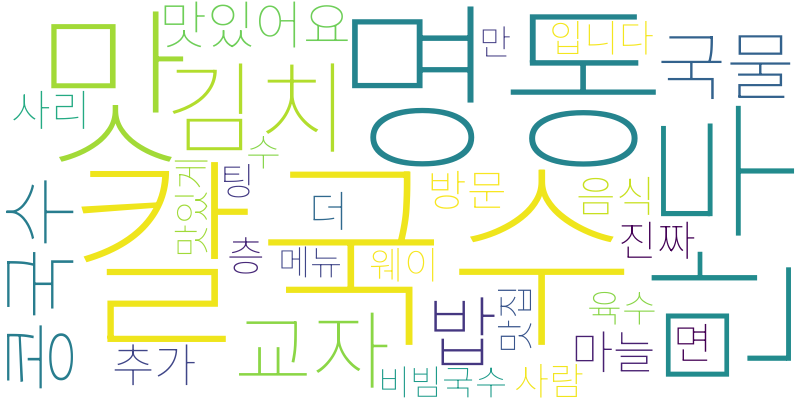

In [200]:
# 명동 교자
df_review10['리뷰 시각화'][1]

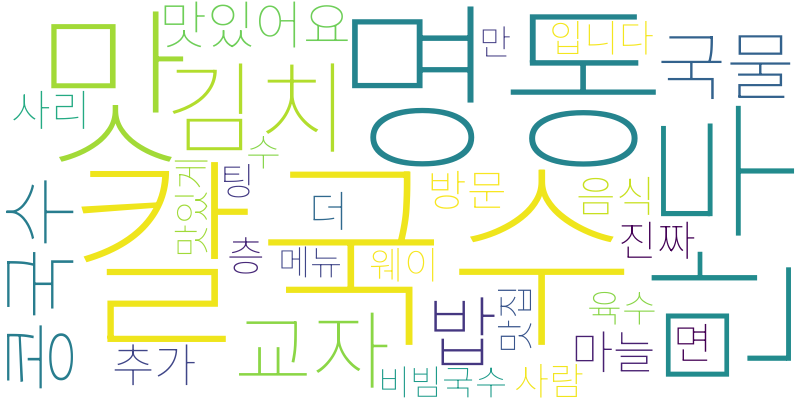'

''
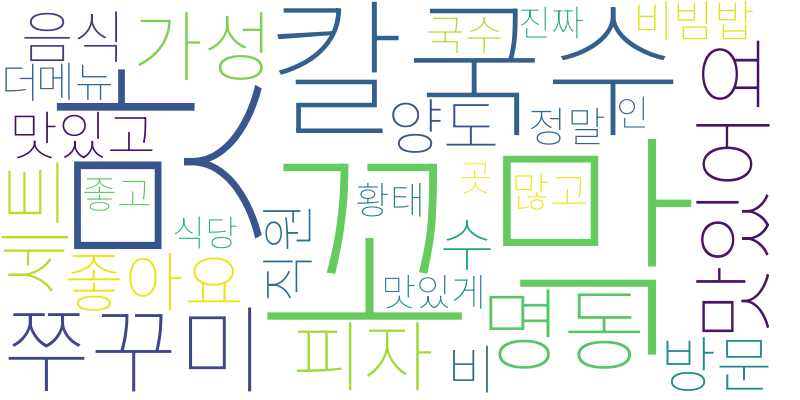

In [201]:
# 더식당
df_review10['리뷰 시각화'][27]

'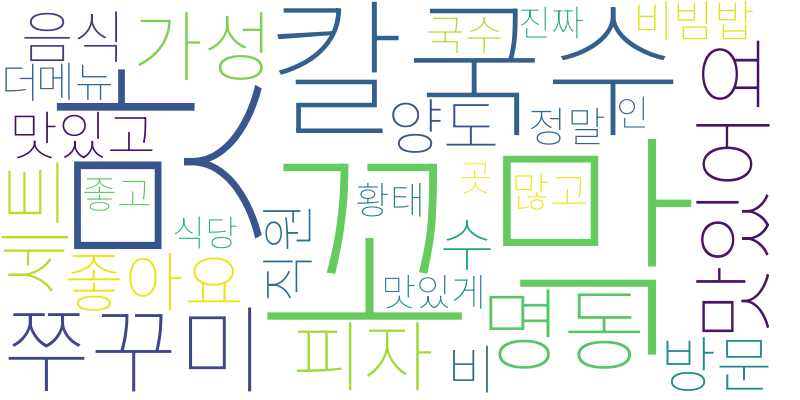'

''
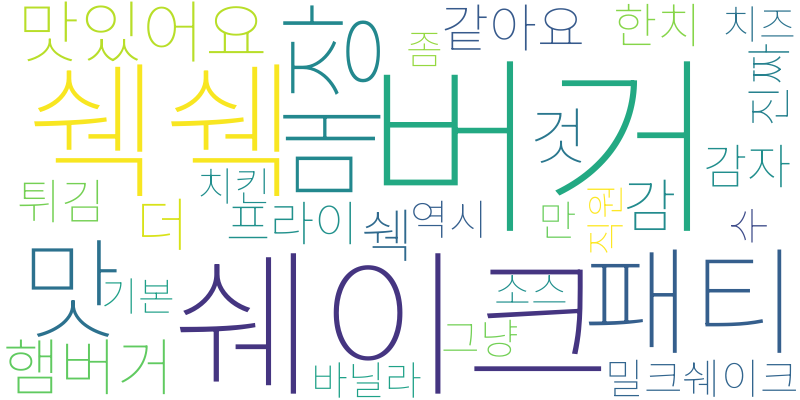

In [202]:
# 쉐이크쉑 강남대로점
df_review10['리뷰 시각화'][583]

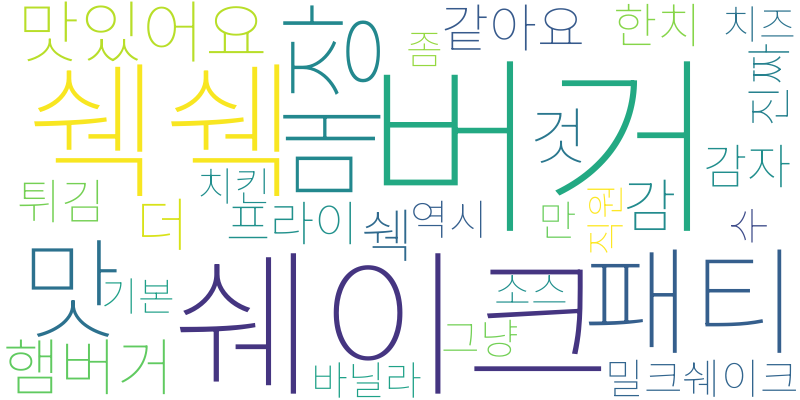'

### 그럼 평점이 낮고 리뷰 개수가 적은 식당의 리뷰는 어떨까?

In [203]:
df_review['리뷰 합계'] = df_review['방문자_리뷰_개수'] + df_review['블로그_리뷰_개수']
df_worst = df_review[(df_review['평점']<=4.0) & (df_review['방문자_리뷰_개수']<=500) & (df_review['블로그_리뷰_개수']<=500)]
df_worst = df_worst.dropna(subset=['개인리뷰'])
df_worst

,Unnamed: 0,이름,역,구,카테고리,방문자_리뷰_개수,블로그_리뷰_개수,평점,주소,영업시간,부가서비스,방문자_리뷰_글,개인리뷰,리뷰 시각화,리뷰 합계
946,946,곽경찬의 시골밥상,이태원역,용산구,한정식,333.0,184.0,3.96,서울 용산구 이태원로 235 시골밥상,매일 10:30 - 20:30 20:00 라스트오더,단체석,"음식이 맛있어요: 118, 가성비가 좋아요: 63, 친절해요: 39, 재료가 신선해...","친절하셔서 기분좋게 먹고가요:), 여기 뭐에요..리움미술관 들렸다가 먹을곳 찾다가 ...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",517.0


''
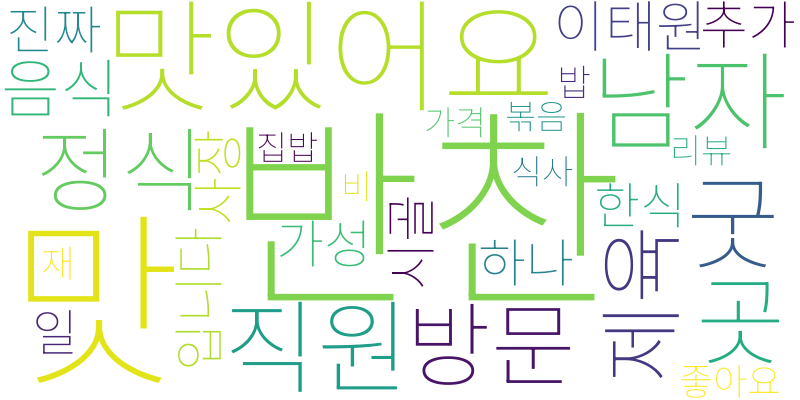

In [204]:
df_worst['리뷰 시각화'][946]

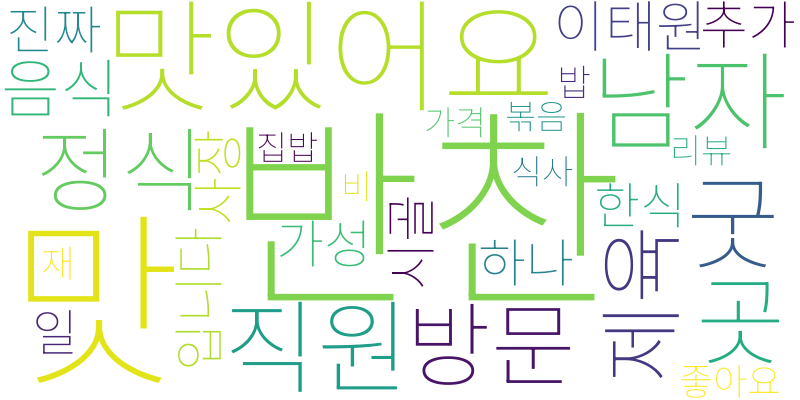'

### 짧은 리뷰 선택지 중 가장 많이 선택된 키워드는?

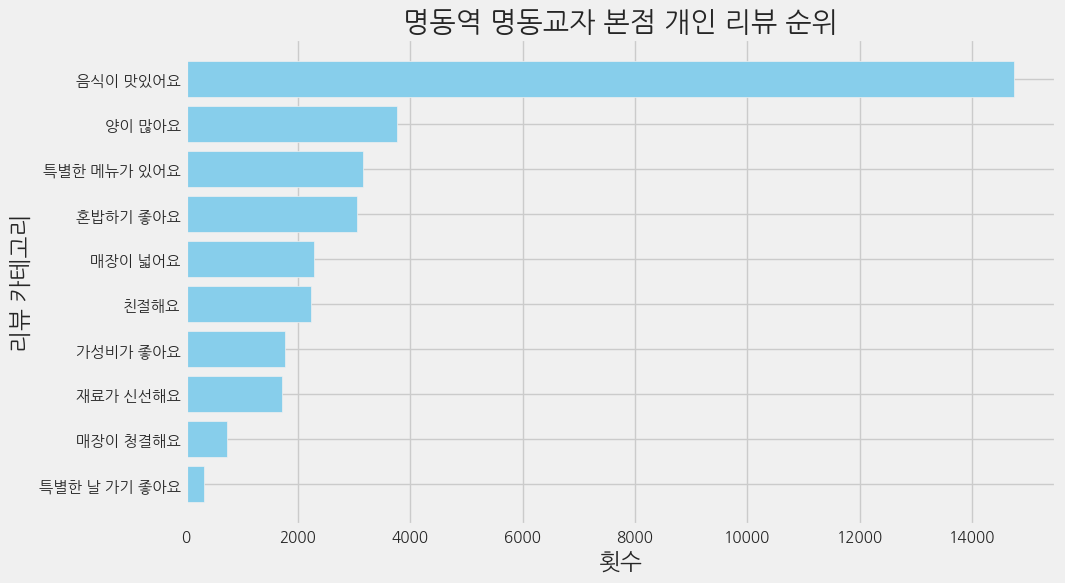

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# 리뷰 문자열
review_str = df_review['방문자_리뷰_글'][1]

# 리뷰 문자열을 쉼표로 분할하여 각 항목을 추출
review_items = review_str.split(', ')

# 각 항목에서 리뷰 카테고리와 횟수를 추출하여 딕셔너리에 저장
review_count = {}
for item in review_items:
    category, count = item.split(': ')
    review_count[category] = int(count)

# 횟수가 가장 많은 리뷰 top 10을 추출
top_10_review = sorted(review_count.items(), key=lambda x: x[1], reverse=True)[:10]

# 데이터프레임으로 변환
df_top_10 = pd.DataFrame(top_10_review, columns=['리뷰 카테고리', '횟수'])

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['리뷰 카테고리'], df_top_10['횟수'], color='skyblue')
plt.xlabel('횟수')
plt.ylabel('리뷰 카테고리')
plt.title('명동역 명동교자 본점 개인 리뷰 순위')
plt.gca().invert_yaxis()  # y 축 뒤집기
plt.show()

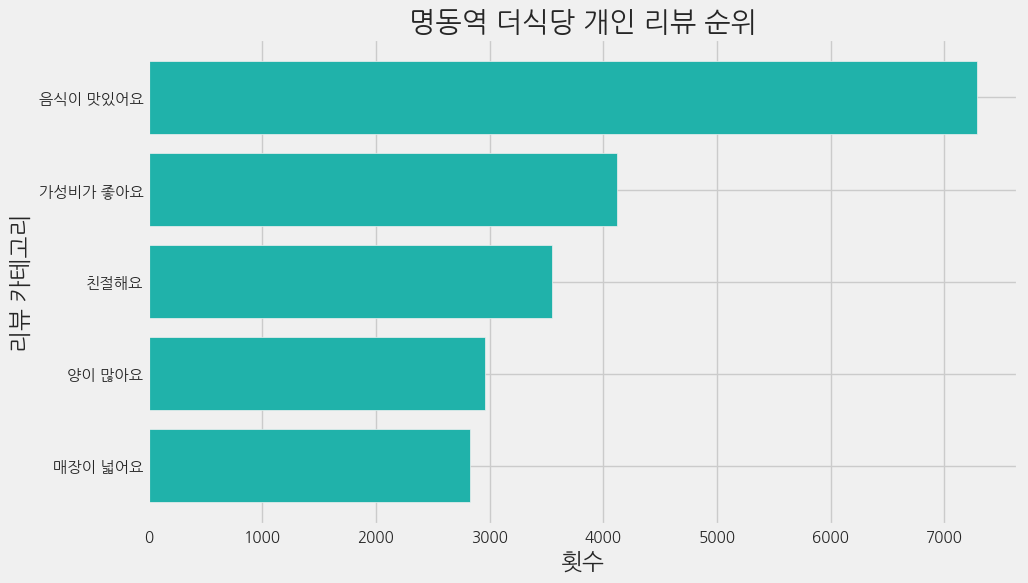

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# 리뷰 문자열
review_str = df_review['방문자_리뷰_글'][27]

# 리뷰 문자열을 쉼표로 분할하여 각 항목을 추출
review_items = review_str.split(', ')

# 각 항목에서 리뷰 카테고리와 횟수를 추출하여 딕셔너리에 저장
review_count = {}
for item in review_items:
    category, count = item.split(': ')
    review_count[category] = int(count)

# 횟수가 가장 많은 리뷰 top 10을 추출
top_10_review = sorted(review_count.items(), key=lambda x: x[1], reverse=True)[:10]

# 데이터프레임으로 변환
df_top_10 = pd.DataFrame(top_10_review, columns=['리뷰 카테고리', '횟수'])

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['리뷰 카테고리'], df_top_10['횟수'], color='lightseagreen')
plt.xlabel('횟수')
plt.ylabel('리뷰 카테고리')
plt.title('명동역 더식당 개인 리뷰 순위')
plt.gca().invert_yaxis()  # y 축 뒤집기
plt.show()

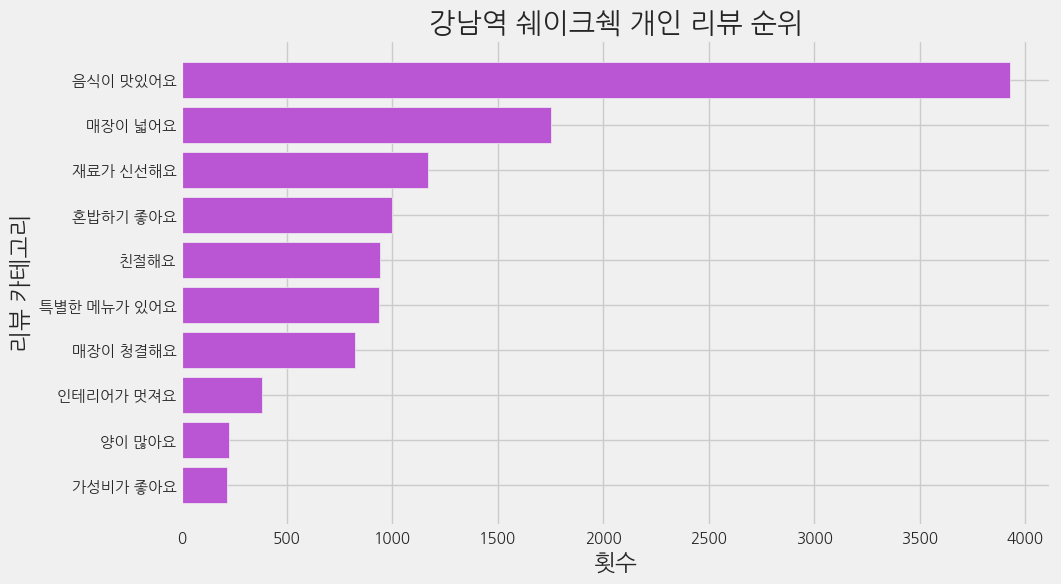

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# 리뷰 문자열
review_str = df_review['방문자_리뷰_글'][583]

# 리뷰 문자열을 쉼표로 분할하여 각 항목을 추출
review_items = review_str.split(', ')

# 각 항목에서 리뷰 카테고리와 횟수를 추출하여 딕셔너리에 저장
review_count = {}
for item in review_items:
    category, count = item.split(': ')
    review_count[category] = int(count)

# 횟수가 가장 많은 리뷰 top 10을 추출
top_10_review = sorted(review_count.items(), key=lambda x: x[1], reverse=True)[:10]

# 데이터프레임으로 변환
df_top_10 = pd.DataFrame(top_10_review, columns=['리뷰 카테고리', '횟수'])

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['리뷰 카테고리'], df_top_10['횟수'], color='mediumorchid')
plt.xlabel('횟수')
plt.ylabel('리뷰 카테고리')
plt.title('강남역 쉐이크쉑 개인 리뷰 순위')
plt.gca().invert_yaxis()  # y 축 뒤집기
plt.show()

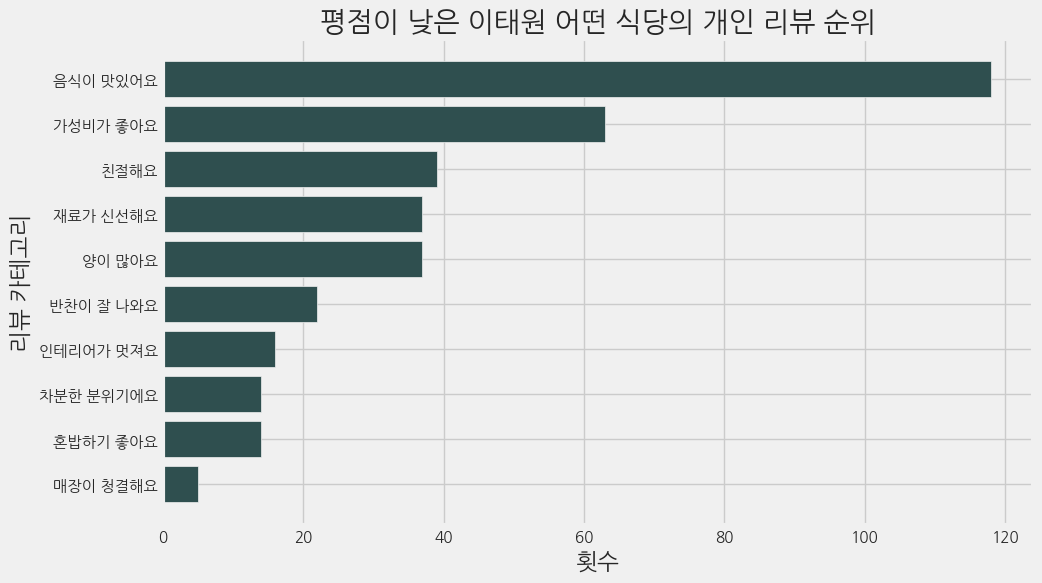

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# 리뷰 문자열
review_str = df_review['방문자_리뷰_글'][946]

# 리뷰 문자열을 쉼표로 분할하여 각 항목을 추출
review_items = review_str.split(', ')

# 각 항목에서 리뷰 카테고리와 횟수를 추출하여 딕셔너리에 저장
review_count = {}
for item in review_items:
    category, count = item.split(': ')
    review_count[category] = int(count)

# 횟수가 가장 많은 리뷰 top 10을 추출
top_10_review = sorted(review_count.items(), key=lambda x: x[1], reverse=True)[:10]

# 데이터프레임으로 변환
df_top_10 = pd.DataFrame(top_10_review, columns=['리뷰 카테고리', '횟수'])

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['리뷰 카테고리'], df_top_10['횟수'], color='darkslategray')
plt.xlabel('횟수')
plt.ylabel('리뷰 카테고리')
plt.title('평점이 낮은 이태원 어떤 식당의 개인 리뷰 순위')
plt.gca().invert_yaxis()  # y 축 뒤집기
plt.show()

### 압구정 동 연령 비율을 중심으로 접근해보자

In [209]:
import pandas as pd
df_age = pd.read_csv('../data/local_people/주민등록인구(연령별_동별)_20230914102533.csv', encoding='utf-8')
#df_apgu = df_apgu[df_apgu['동별(2)']=='명동']
df_age

,동별(1),동별(2),항목,2023 2/4,2023 2/4.1,2023 2/4.2,2023 2/4.3,2023 2/4.4,2023 2/4.5,2023 2/4.6,...,2023 2/4.12,2023 2/4.13,2023 2/4.14,2023 2/4.15,2023 2/4.16,2023 2/4.17,2023 2/4.18,2023 2/4.19,2023 2/4.20,2023 2/4.21
0,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,종로구,사직동,계,9362,181,319,330,345,426,674,...,693,724,555,364,337,310,195,72,17,4
2,종로구,사직동,한국인,9089,174,315,323,341,420,656,...,675,699,540,360,336,308,194,71,17,4
3,종로구,사직동,외국인,273,7,4,7,4,6,18,...,18,25,15,4,1,2,1,1,-,-
4,종로구,삼청동,계,2576,35,76,110,104,110,156,...,188,230,199,141,115,94,58,23,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,강남구,대치2동,한국인,37026,620,1458,3010,3307,2155,1895,...,2536,2429,2060,1537,1007,477,217,89,23,4
159,강남구,대치2동,외국인,154,-,-,-,6,3,16,...,14,6,6,1,2,-,-,-,-,-
160,강남구,개포2동,계,38873,1319,2104,2526,2360,2307,2124,...,2800,2442,2087,1428,841,386,181,75,31,2
161,강남구,개포2동,한국인,38769,1318,2104,2525,2358,2304,2115,...,2792,2439,2087,1428,840,385,181,75,31,2


In [210]:
# 두 번째 행을 열 이름으로 설정
df_age.columns = df_age.iloc[0]

# 첫 번째 행 삭제 후 인덱스 초기화
df_age = df_age[1:].reset_index(drop=True)
df_age

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,종로구,사직동,계,9362,181,319,330,345,426,674,...,693,724,555,364,337,310,195,72,17,4
1,종로구,사직동,한국인,9089,174,315,323,341,420,656,...,675,699,540,360,336,308,194,71,17,4
2,종로구,사직동,외국인,273,7,4,7,4,6,18,...,18,25,15,4,1,2,1,1,-,-
3,종로구,삼청동,계,2576,35,76,110,104,110,156,...,188,230,199,141,115,94,58,23,4,2
4,종로구,삼청동,한국인,2277,29,56,79,86,103,147,...,174,217,176,130,112,94,56,23,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,강남구,대치2동,한국인,37026,620,1458,3010,3307,2155,1895,...,2536,2429,2060,1537,1007,477,217,89,23,4
158,강남구,대치2동,외국인,154,-,-,-,6,3,16,...,14,6,6,1,2,-,-,-,-,-
159,강남구,개포2동,계,38873,1319,2104,2526,2360,2307,2124,...,2800,2442,2087,1428,841,386,181,75,31,2
160,강남구,개포2동,한국인,38769,1318,2104,2525,2358,2304,2115,...,2792,2439,2087,1428,840,385,181,75,31,2


In [211]:
filtered_df = df_age[(df_age['동별(1)'] == '강남구') & (df_age['항목'] == '계')]
filtered_df

,동별(1),동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
96,강남구,신사동,계,15799,329,519,724,830,919,1131,...,1081,957,860,735,690,471,248,87,25,1
99,강남구,논현1동,계,21954,270,302,372,476,1330,3016,...,1245,1167,1036,754,610,376,173,74,16,4
102,강남구,개포3동,계,17133,412,648,858,804,823,872,...,1098,1227,1284,1012,680,393,167,66,18,2
105,강남구,논현2동,계,21003,369,572,552,693,1188,2214,...,1259,1193,1055,818,672,418,178,73,15,2
108,강남구,삼성1동,계,12597,261,434,546,631,676,923,...,936,888,790,572,441,294,111,41,14,2
111,강남구,삼성2동,계,30724,758,1296,1789,1817,1632,2116,...,1851,1398,1238,1053,840,545,203,70,17,5
114,강남구,대치1동,계,23829,293,1240,2710,2613,1372,884,...,1394,1164,966,761,519,301,133,53,14,3
117,강남구,대치4동,계,19131,221,383,803,1469,1392,1760,...,1215,898,696,517,451,277,109,39,6,1
120,강남구,역삼1동,계,35476,454,406,572,744,2068,5335,...,1787,1668,1353,883,722,493,208,61,17,3
123,강남구,역삼2동,계,37261,686,1629,3026,2790,2051,2545,...,1952,1404,1285,1021,850,498,219,63,13,3


In [212]:
df1 = filtered_df[['동별(2)','30~34세', '35~39세', '40~44세', '45~49세']]
df1

,동별(2),30~34세,35~39세,40~44세,45~49세
96,신사동,1105,1027,1191,1375
99,논현1동,3131,2292,2140,1625
102,개포3동,1180,1259,1498,1456
105,논현2동,2305,1961,2002,1700
108,삼성1동,961,864,1035,1013
111,삼성2동,2406,2352,3057,3200
114,대치1동,585,771,2153,3185
117,대치4동,1835,1341,1625,1934
120,역삼1동,5992,4130,3628,2489
123,역삼2동,2389,2344,3959,4645


In [213]:
df1['30~49세'] = df1['30~34세'].astype(int) + df1['35~39세'].astype(int) + df1['40~44세'].astype(int) + df1['45~49세'].astype(int)
df1 = df1[['동별(2)', '30~49세']]
df1

,동별(2),30~49세
96,신사동,4698
99,논현1동,9188
102,개포3동,5393
105,논현2동,7968
108,삼성1동,3873
111,삼성2동,11015
114,대치1동,6694
117,대치4동,6735
120,역삼1동,16239
123,역삼2동,13337


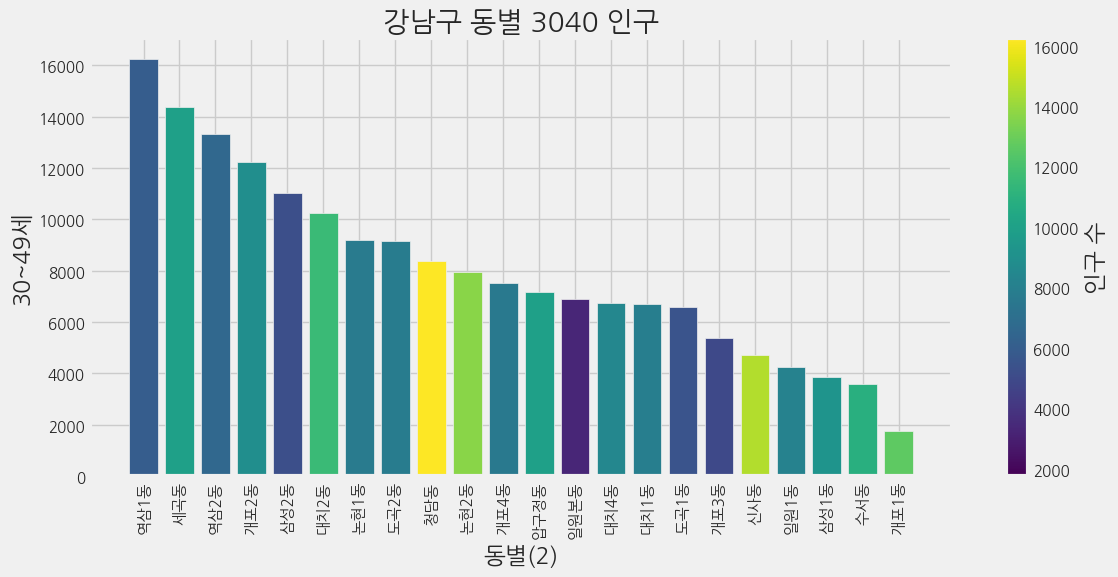

In [214]:
# 막대 색상 설정
colors = plt.cm.viridis(df1['30~49세'] / max(df1['30~49세']))  # 컬러맵을 사용하여 색상 설정

# 데이터프레임을 막대 길이에 따라 내림차순으로 정렬
df1 = df1.sort_values(by='30~49세', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(df1['동별(2)'], df1['30~49세'], color=colors)
plt.xlabel('동별(2)')
plt.ylabel('30~49세')
plt.title('강남구 동별 3040 인구')

# 컬러바 추가 (색상 설명)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(df1['30~49세']), vmax=max(df1['30~49세'])))
sm.set_array([])  # 빈 배열 설정
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('인구 수')

plt.xticks(rotation=90)  # x축 레이블을 90도 회전해서 표시
plt.tight_layout()

# 그래프 표시
plt.show()

In [215]:
# '0~4세'와 '5~9세'를 '10세 이하' 열로 묶기
for i in range(10):
    if i == 0:
        filtered_df['10세 미만'] = int(filtered_df['0~4세']) + int(filtered_df['5~9세'])
        filtered_df = filtered_df.drop(['0~4세', '5~9세'], axis=1)
    else:
        filtered_df[f'{i}0대'] = int(filtered_df[f'{i}0~{i}4세']) + int(filtered_df[f'{i}5~{i}9세'])
        # 필요 없는 연령대 열 삭제
        filtered_df = filtered_df.drop([f'{i}0~{i}4세', f'{i}5~{i}9세'], axis=1)
filtered_df['90세 이상'] = int(filtered_df['90대']) + int(filtered_df['100세 이상'])
filtered_df = filtered_df.drop(['90대'], axis=1)
filtered_df = filtered_df.drop(['100세 이상'], axis=1)

# 결과 출력
filtered_df

TypeError: cannot convert the series to <class 'int'>

In [216]:
import matplotlib.pyplot as plt
# 필요한 연령대 정보 추출 (항목 열은 이미 '계'로 필터링되었습니다)
age_groups = ['10세 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90세 이상']

# 연령대 라벨 및 데이터 추출
age_labels = age_groups
age_data = filtered_df[age_groups].values.flatten()

# 파이 그래프 색상 설정
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

# 파이 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(age_data, labels=age_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('강남구 압구정동 연령대 분포')
plt.axis('equal')  # 원형 그래프로 만들기
plt.show()

KeyError: "None of [Index(['10세 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대',\n       '90세 이상'],\n      dtype='object', name=0)] are in the [columns]"

In [217]:
import pandas as pd
df_people = pd.read_csv('../data/local_people/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')
#df_apgu = df_apgu[df_apgu['동별(2)']=='명동']
df_people

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202308,1호선,동대문,546,25,10772,1896,8832,6226,13629,...,8425,542,2279,1,193,0,0,0,0,20230903
1,202308,1호선,동묘앞,171,9,2995,984,3744,4674,7309,...,4124,100,1645,0,242,0,0,0,0,20230903
2,202308,1호선,서울역,592,40,8366,9101,12963,51581,40859,...,12999,2364,2482,1,175,0,0,0,0,20230903
3,202308,1호선,시청,37,2,2332,4699,3968,24026,7858,...,4132,294,934,1,18,0,0,0,0,20230903
4,202308,1호선,신설동,396,33,9200,2357,9339,8152,21693,...,9042,300,1934,0,0,0,0,0,0,20230903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61249,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
61250,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
61251,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
61252,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [218]:
df_people['출근 시간 승하차 인원'] = 0
df_people['퇴근 시간 승하차 인원'] = 0
for i in range(6, 9):
    num = df_people[f'0{i}시-0{i+1}시 승차인원'] + df_people[f'0{i}시-0{i+1}시 하차인원']
    df_people['출근 시간 승하차 인원'] += num
for i in range(17, 19):
    num = df_people[f'{i}시-{i+1}시 승차인원'] + df_people[f'{i}시-{i+1}시 하차인원']
    df_people['퇴근 시간 승하차 인원'] += num
df_people = df_people[['사용월','지하철역', '출근 시간 승하차 인원', '퇴근 시간 승하차 인원']]
df_people    

,사용월,지하철역,출근 시간 승하차 인원,퇴근 시간 승하차 인원
0,202308,동대문,77813,87662
1,202308,동묘앞,53288,71891
2,202308,서울역,518955,578706
3,202308,시청,315233,309496
4,202308,신설동,147860,141142
...,...,...,...,...
61249,201501,운길산,5881,8393
61250,201501,원덕,2413,2500
61251,201501,중랑,68175,50011
61252,201501,팔당,4328,5678


In [219]:
df_people['출퇴근 시간 승하차 인원'] = df_people['출근 시간 승하차 인원'] + df_people['퇴근 시간 승하차 인원']
df2 = df_people[df_people['사용월']==202308]
df2


,사용월,지하철역,출근 시간 승하차 인원,퇴근 시간 승하차 인원,출퇴근 시간 승하차 인원
0,202308,동대문,77813,87662,165475
1,202308,동묘앞,53288,71891,125179
2,202308,서울역,518955,578706,1097661
3,202308,시청,315233,309496,624729
4,202308,신설동,147860,141142,289002
...,...,...,...,...,...
611,202308,원덕,3953,3092,7045
612,202308,중랑,67988,51796,119784
613,202308,지평,1015,516,1531
614,202308,팔당,9115,8496,17611


In [220]:
target_stations = ['홍대입구', '강남', '명동', '신촌', '서울대입구', '사당', '혜화', '가산디지털단지', '서울', '청담', '종로3가', '을지로입구', '동대문역사문화공원', '성신여대입구', '이태원', '성수', '영등포', '여의도', '잠실', '압구정', '신사', '판교']

# '지하철역' 열의 값이 target_stations에 포함된 행만 남깁니다.
df_people = df2[df2['지하철역'].isin(target_stations)]

# 결과를 확인합니다.
df_people = df_people.drop(['사용월'], axis=1)
df_people

,지하철역,출근 시간 승하차 인원,퇴근 시간 승하차 인원,출퇴근 시간 승하차 인원
7,종로3가,125725,244190,369915
10,강남,640636,889755,1530391
25,사당,351026,457743,808769
31,성수,427812,515032,942844
40,신촌,236144,388155,624299
50,을지로입구,543274,591237,1134511
59,홍대입구,331840,777333,1109173
78,신사,198424,322747,521171
80,압구정,269737,349584,619321
89,종로3가,73413,123974,197387


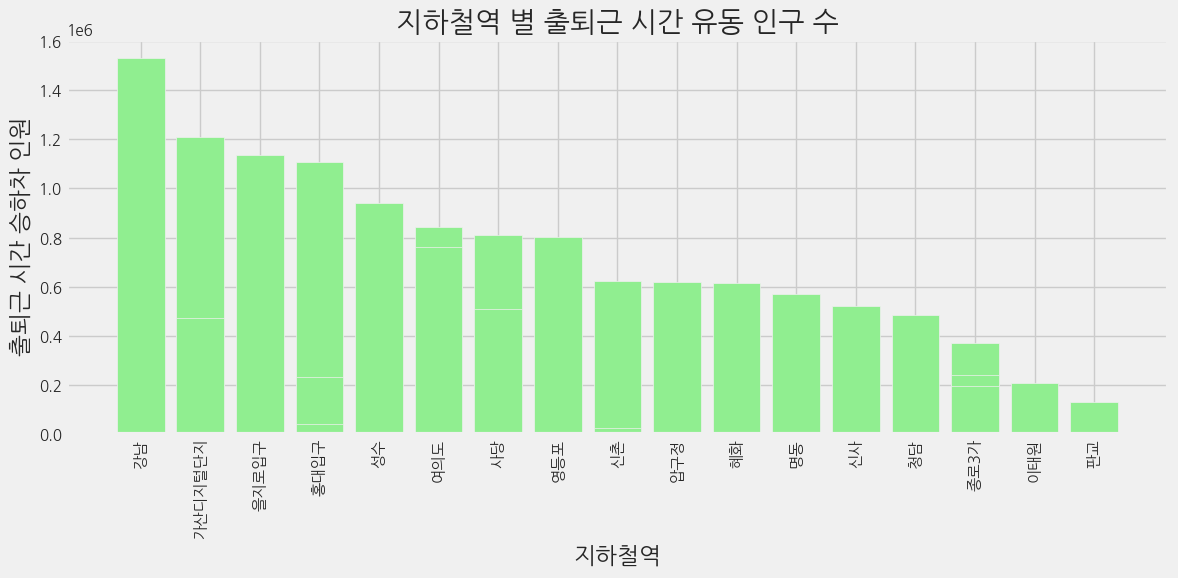

In [240]:
# 데이터프레임을 막대 길이에 따라 내림차순으로 정렬
df_people = df_people.sort_values(by='출퇴근 시간 승하차 인원', ascending=False)
#sns.set(style="whitegrid")
#palette = sns.color_palette("magma", n_colors=len(df_people))

# '지하철역' 별 '출퇴근 시간 승하차 인원' 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_people['지하철역'], df_people['출퇴근 시간 승하차 인원'], color = 'lightgreen')
#barplot = sns.barplot(x=df_people['지하철역'], y='지하철역', data=df_people, palette=palette)

plt.xlabel('지하철역')
plt.ylabel('출퇴근 시간 승하차 인원')
plt.title('지하철역 별 출퇴근 시간 유동 인구 수')
plt.xticks(rotation=90)  # X 축 레이블을 90도 회전하여 표시

plt.tight_layout()
plt.show()